<a href="https://colab.research.google.com/github/Oddigeon/devops/blob/master/%D0%9A%D0%A2%D0%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

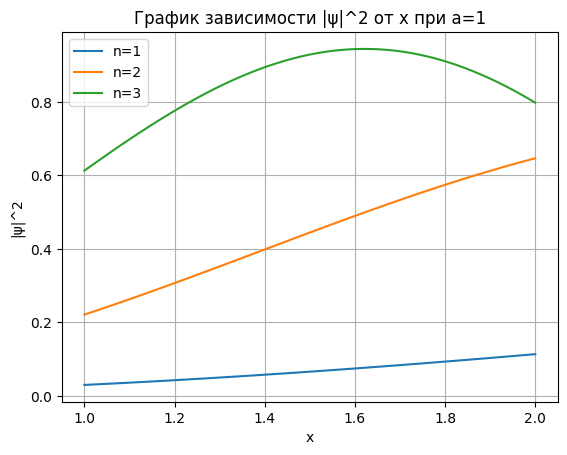

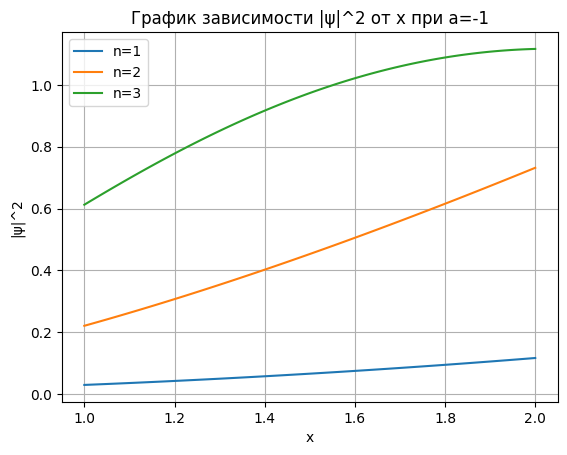

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Заданные параметры
h = 0.01  # Шаг интегрирования
x_range = np.arange(1, 2 + h, h)  # Диапазон x
n_values = [1, 2, 3]  # Значения n
a_values = [1, -1]  # Значения a (a > 0 и a < 0)

def psi_prime(phi):
    return phi

def phi_prime(psi, x, n, a):
    return -0.03 * n**3 * psi + a * (x**2 - 4*x + 3) * 0.04 * n**2 * psi

def runge_kutta(n, a):
    psi = np.zeros(len(x_range))
    phi = np.zeros(len(x_range))

    # Начальные условия
    psi[0] = np.sin(0.173 * n**(3/2))
    phi[0] = 0.173 * n**(3/2) * np.cos(0.173 * n**(3/2))

    for i in range(len(x_range) - 1):
        x = x_range[i]

        k1_psi = h * psi_prime(phi[i])
        k1_phi = h * phi_prime(psi[i], x, n, a)

        k2_psi = h * psi_prime(phi[i] + 0.5 * k1_phi)
        k2_phi = h * phi_prime(psi[i] + 0.5 * k1_psi, x + 0.5 * h, n, a)

        k3_psi = h * psi_prime(phi[i] + 0.5 * k2_phi)
        k3_phi = h * phi_prime(psi[i] + 0.5 * k2_psi, x + 0.5 * h, n, a)

        k4_psi = h * psi_prime(phi[i] + k3_phi)
        k4_phi = h * phi_prime(psi[i] + k3_psi, x + h, n, a)

        psi[i + 1] = psi[i] + (k1_psi + 2 * k2_psi + 2 * k3_psi + k4_psi) / 6
        phi[i + 1] = phi[i] + (k1_phi + 2 * k2_phi + 2 * k3_phi + k4_phi) / 6

    return psi

# Решение и визуализация
for a in a_values:
    plt.figure()
    for n in n_values:
        psi = runge_kutta(n, a)
        psi_squared = psi**2
        plt.plot(x_range, psi_squared, label=f"n={n}")

    plt.title(f"График зависимости |ψ|^2 от x при a={a}")
    plt.xlabel("x")
    plt.ylabel("|ψ|^2")
    plt.legend()
    plt.grid()
    plt.show()

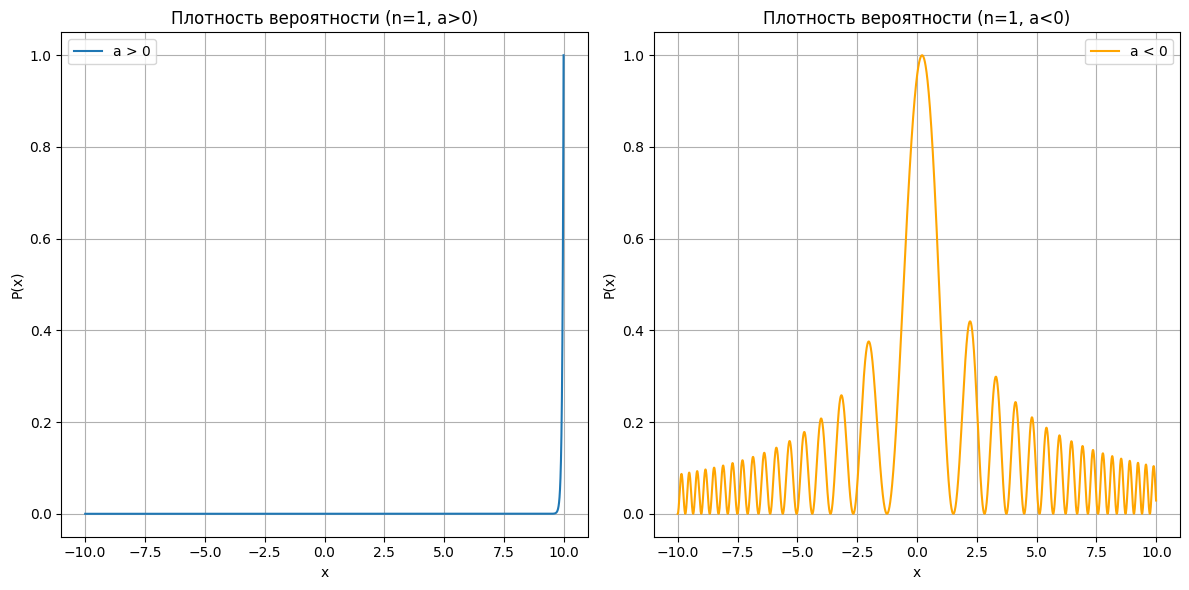

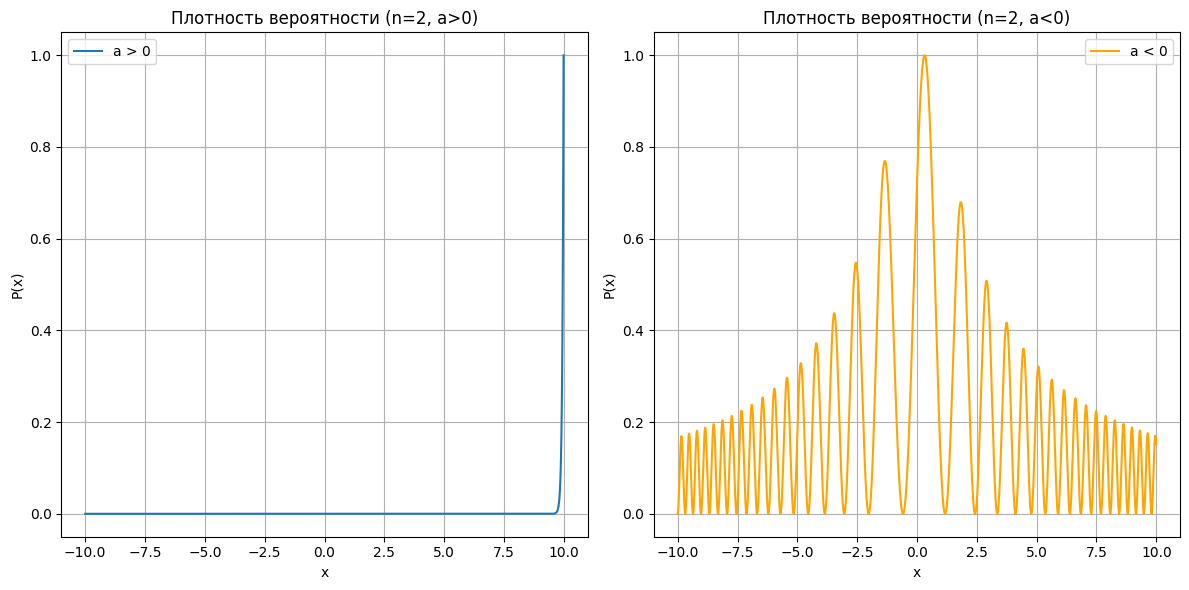

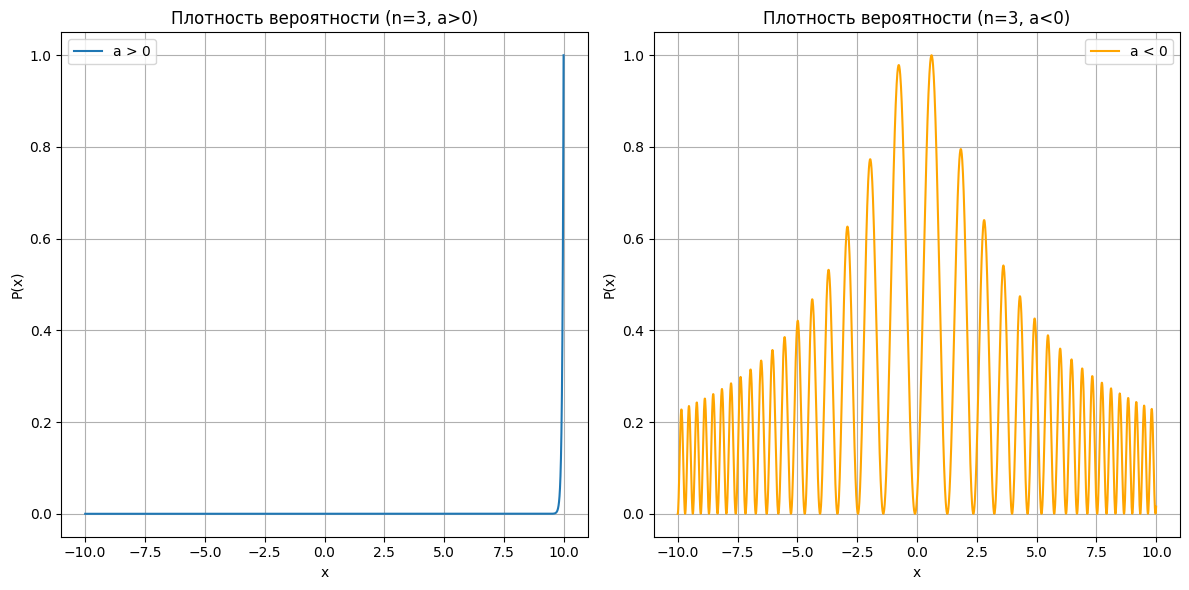

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


def schrodinger_system(y, x, E, a) -> list:

    psi, phi = y
    return [
        phi,
        (a * x**2 - E) * psi,
    ]


def solve_shrodinger(a, E, x_range) -> list:
    y0 = [0.0, 1.0]  # Начальные условия [psi(0), psi'(0)]

    solution = odeint(
        schrodinger_system,
        y0,
        x_range,
        args=(E, a)
    )

    return solution[:, 0]


h = 0.01
x = np.arange(-10, 10, h)

a_pos = 1
a_neg = -1


for n in [1, 2, 3]:
    E = 2 * n - 1


    psi_pos = solve_shrodinger(a_pos, E, x)
    prob_density_pos = np.abs(psi_pos)**2

    psi_neg = solve_shrodinger(a_neg, E, x)
    prob_density_neg = np.abs(psi_neg)**2


    prob_density_pos /= np.max(prob_density_pos)
    prob_density_neg /= np.max(prob_density_neg)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(x, prob_density_pos, label="a > 0")
    plt.title(f"Плотность вероятности (n={n}, a>0)")
    plt.xlabel("x")
    plt.ylabel("P(x)")
    plt.grid(True)
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(x, prob_density_neg, label="a < 0", color="orange")
    plt.title(f"Плотность вероятности (n={n}, a<0)")
    plt.xlabel("x")
    plt.ylabel("P(x)")
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()


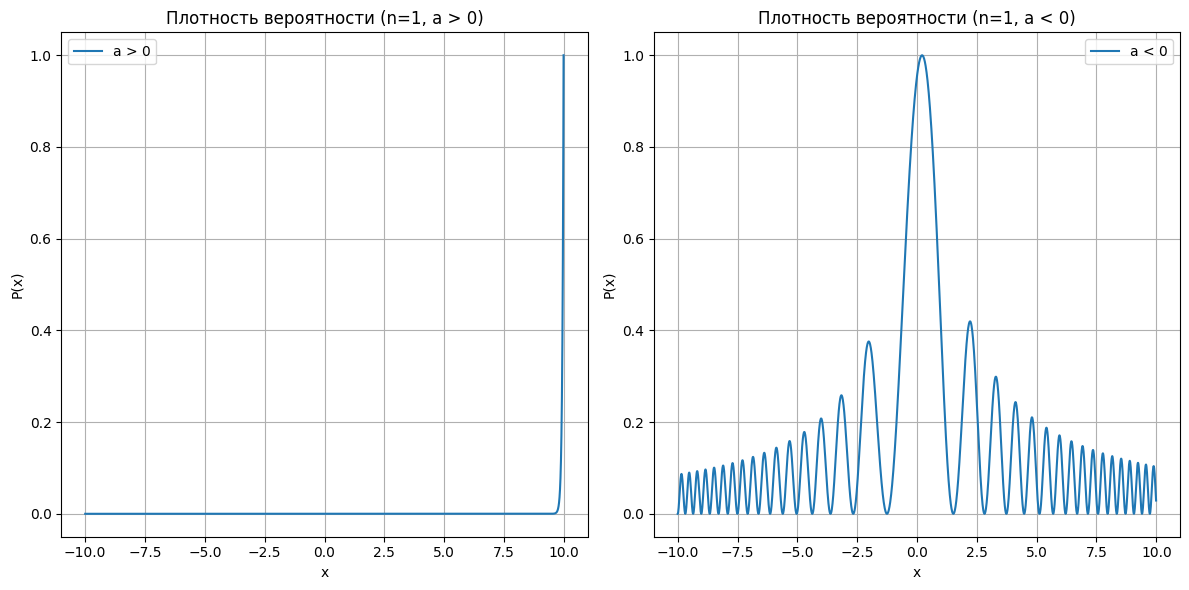

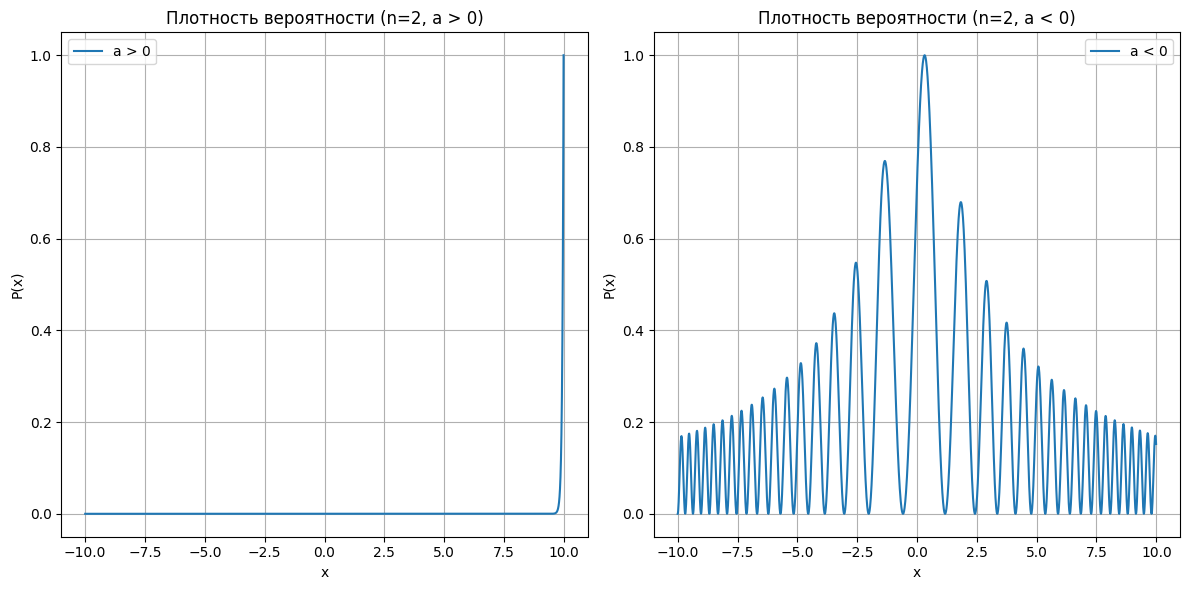

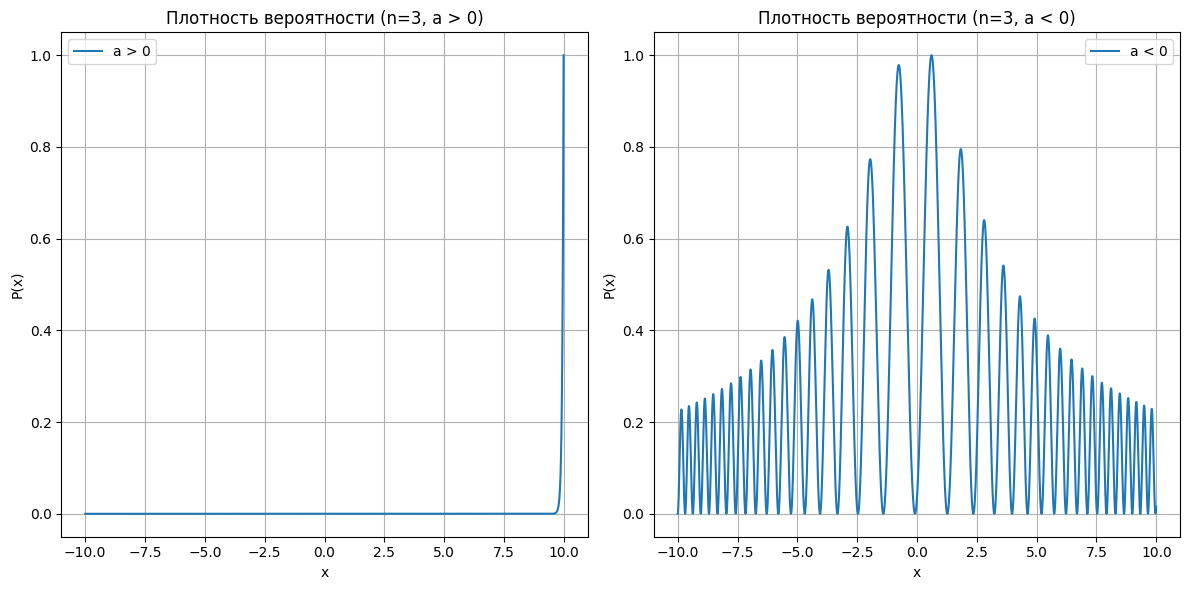

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def schrodinger_system(y, x, E, a):
    psi, phi = y
    return [
        phi,
        (a * x**2 - E) * psi,
    ]


def solve_schrodinger(a, E, x_range):
    y0 = [0.0, 1.0]
    solution = odeint(schrodinger_system, y0, x_range, args=(E, a))
    return solution[:, 0]

h = 0.01
x = np.arange(-10, 10, h)

a_values = {"a > 0": 1, "a < 0": -1}

for n in [1, 2, 3]:
    E = 2 * n - 1

    plt.figure(figsize=(12, 6))

    for idx, (label, a) in enumerate(a_values.items()):
        psi = solve_schrodinger(a, E, x)
        prob_density = np.abs(psi)**2
        prob_density /= np.max(prob_density)

        plt.subplot(1, 2, idx + 1)
        plt.plot(x, prob_density, label=label)
        plt.title(f"Плотность вероятности (n={n}, {label})")
        plt.xlabel("x")
        plt.ylabel("P(x)")
        plt.grid(True)
        plt.legend()

    plt.tight_layout()
    plt.show()


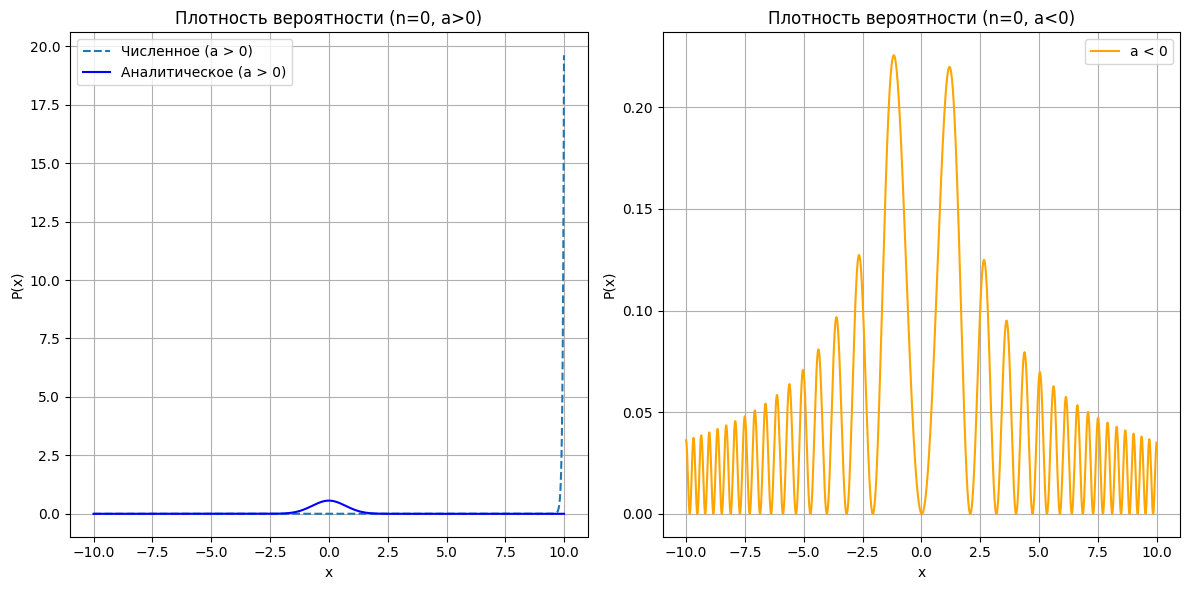

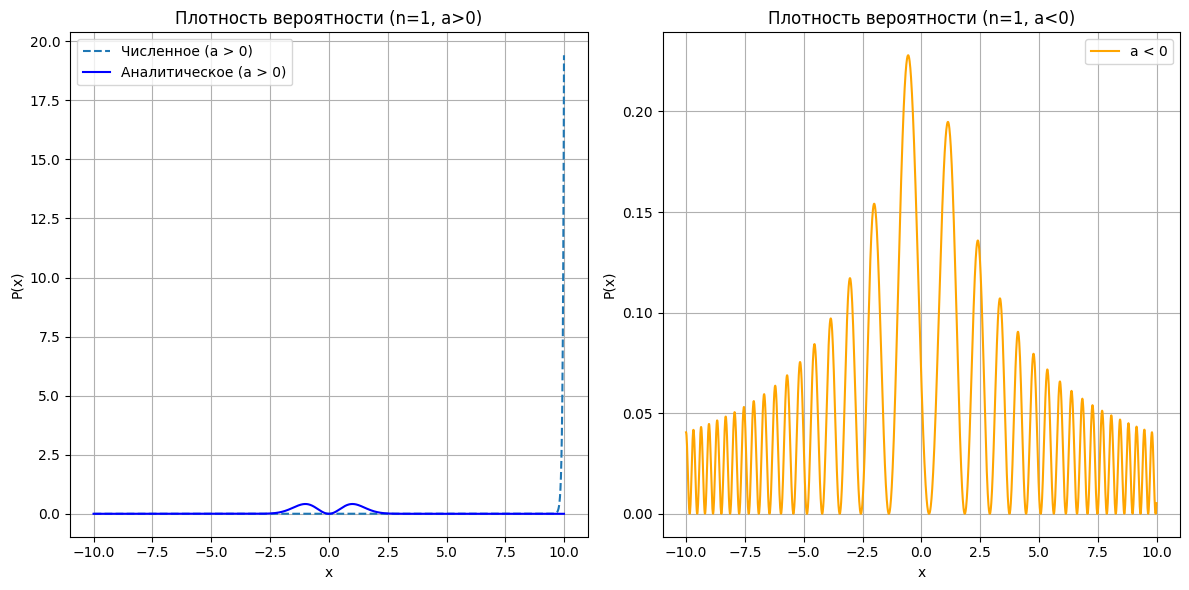

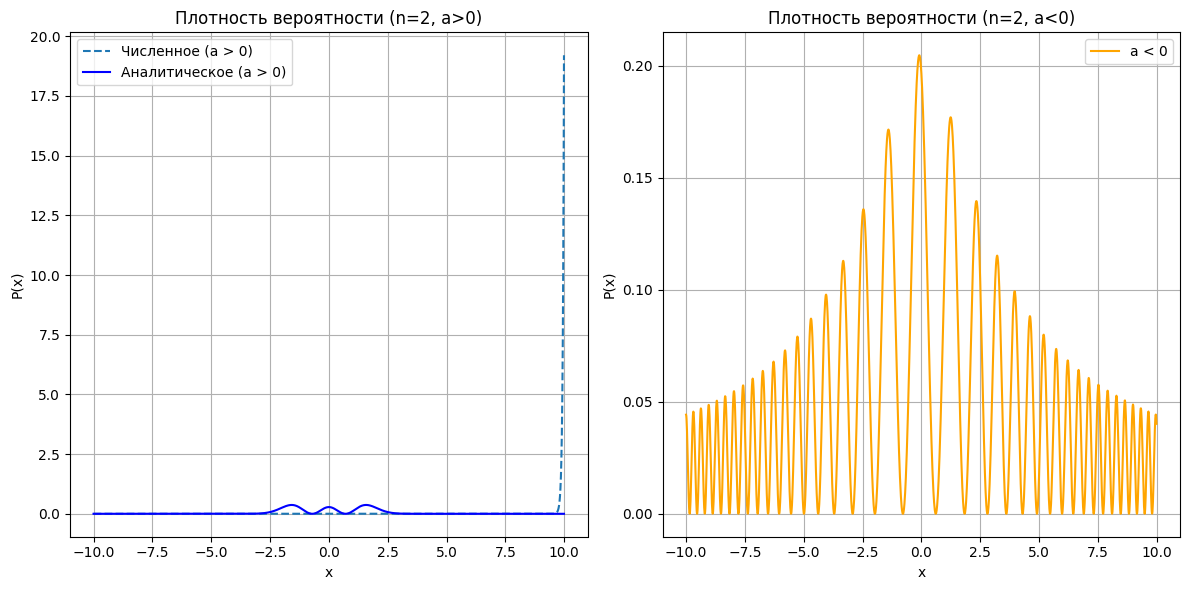

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


def schrodinger_system(x, y, E, a):
    """
    Система дифференциальных уравнений Шрёдингера.
    """
    psi, phi = y
    dpsi_dx = phi
    dphi_dx = (a * x**2 - E) * psi
    return [dpsi_dx, dphi_dx]


def solve_schrodinger(a, E, x_range):
    """
    Решение уравнения Шрёдингера с использованием solve_ivp.
    """
    # Начальные условия [psi(0), psi'(0)]
    y0 = [1.0, 0.0]  # Четная симметрия

    # Решение уравнения
    solution = solve_ivp(
        schrodinger_system,
        t_span=(x_range[0], x_range[-1]),
        y0=y0,
        t_eval=x_range,
        args=(E, a),
        method='RK45'  # Устойчивый метод Рунге-Кутты
    )

    return solution.y[0]  # Возвращаем только psi


def harmonic_oscillator_solution(x, n):
    """
    Аналитическое решение уравнения Шрёдингера для гармонического осциллятора.
    """
    from scipy.special import hermite
    from math import factorial, sqrt, pi

    Hn = hermite(n)  # Полином Эрмита
    prefactor = 1 / (sqrt(2**n * factorial(n) * sqrt(pi)))
    return prefactor * np.exp(-x**2 / 2) * Hn(x)


# Параметры
h = 0.01
x = np.arange(-10, 10, h)

a_pos = 1
a_neg = -1

# Перебор квантовых чисел n
for n in [0, 1, 2]:  # Уровни энергии n = 0, 1, 2
    E = 2 * n + 1  # Энергия для гармонического осциллятора

    # Решение для положительного и отрицательного коэффициента a
    psi_pos = solve_schrodinger(a_pos, E, x)
    prob_density_pos = np.abs(psi_pos)**2

    psi_neg = solve_schrodinger(a_neg, E, x)
    prob_density_neg = np.abs(psi_neg)**2

    # Аналитическое решение для гармонического осциллятора
    analytic_solution = harmonic_oscillator_solution(x, n)
    prob_density_analytic = np.abs(analytic_solution)**2

    # Нормализация плотностей вероятности
    prob_density_pos /= np.trapz(prob_density_pos, x)  # Интеграл под графиком = 1
    prob_density_neg /= np.trapz(prob_density_neg, x)
    prob_density_analytic /= np.trapz(prob_density_analytic, x)

    # Построение графиков
    plt.figure(figsize=(12, 6))

    # График для положительного a (численное и аналитическое решение)
    plt.subplot(1, 2, 1)
    plt.plot(x, prob_density_pos, label="Численное (a > 0)", linestyle='dashed')
    plt.plot(x, prob_density_analytic, label="Аналитическое (a > 0)", color='blue')
    plt.title(f"Плотность вероятности (n={n}, a>0)")
    plt.xlabel("x")
    plt.ylabel("P(x)")
    plt.grid(True)
    plt.legend()

    # График для отрицательного a
    plt.subplot(1, 2, 2)
    plt.plot(x, prob_density_neg, label="a < 0", color="orange")
    plt.title(f"Плотность вероятности (n={n}, a<0)")
    plt.xlabel("x")
    plt.ylabel("P(x)")
    plt.grid(True)
    plt.legend()

    # Отображение графиков
    plt.tight_layout()
    plt.show()